In [34]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

#### Question - 1 (i)

In [35]:
def DiagDom(A) -> None:
    """Function that checks if the given matrix is diagonal dominant or not."""
    diag_coeff = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=1) - diag_coeff
    if np.all(diag_coeff > row_sum):
        print("\nMatrix is Diagonally Dominant")
    else:
        print("\nNOT Diagonally Dominant")
    return


A = np.random.randint(-10, 10, size=(4, 4))
print(A)
DiagDom(A)


[[ -8 -10  -4   0]
 [  4   3   4   6]
 [  3  -6   2   3]
 [ -8   9   3   3]]

NOT Diagonally Dominant


In [36]:
def generate_Diag_Dominant_matrix():
    """
    This function will generate diagonal dominant martix.
    This function may take time as matrix generation is completely random.
    """
    flag = True
    iteration_counter = 0
    while flag:
        A = np.random.randint(-10, 10, size=(4, 4))
        diag_coeff = np.diag(np.abs(A))
        row_sum = np.sum(np.abs(A), axis=1) - diag_coeff
        if np.all(diag_coeff > row_sum):
            flag = False
        else:
            flag = True
        iteration_counter += 1
    # print(f"Diagonal dominant martix Iteration completed after {iteration_counter} iterations")
    print(A)
    return A


# generate_Diag_Dominant_matrix()


#### Question - 1 (ii)

In [37]:
def gauss_seidal(A, b, n, iteration_print_count=5) -> list:
    """Implementation of Gauss seidal Algorithm"""
    # this list will contain the np.linalg.norm(<difference arry>)
    iterations_list = []
    print("System of equations:\n")
    # iterating over the rows
    for i in range(A.shape[0]):
        row = ["{0:3g}*x{1}".format(A[i, j], j + 1) for j in range(A.shape[1])]
        print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))
        x = np.zeros_like(b)

    print("\nIterations:\n")

    # Perform n number of iterations
    for it_count in range(0, n):
        x_new = np.zeros_like(x)
        if it_count < iteration_print_count:
            print("Iteration {0}: {1}".format(it_count, x))
            print("1 Norm", np.linalg.norm(x, ord=1))
            print("Inf Norm: ", LA.norm(x, np.inf))
            print("Frobenius Norm", np.linalg.norm(x, ord=2))
            print("*" * 50)

        for i in range(A.shape[0]):
            # using new values directly in x_new
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
            if np.allclose(x, x_new, rtol=1e-8):
                break
        diff_matrix = x_new - x
        iterations_list.append(np.linalg.norm(diff_matrix))
        x = x_new

    error = np.dot(A, x) - b    
    print(f"\nAfter {n} iterations we have")
    print("\nSolution: {0}".format(x))
    print("\nError term in each x: {0}".format(error))

    return iterations_list


In [38]:
# n is number of iterations
n = 5
# initialize the matrix
A = np.random.randint(1, 5, size=(4, 4))
# initialize the RHS vector
b = np.round(np.random.uniform(1, 5, 4), 0)
gauss_seidal(A, b, n);


System of equations:

[  2*x1 +   1*x2 +   4*x3 +   3*x4] = [  2]
[  1*x1 +   2*x2 +   1*x3 +   1*x4] = [  1]
[  4*x1 +   3*x2 +   3*x3 +   4*x4] = [  4]
[  4*x1 +   1*x2 +   3*x3 +   3*x4] = [  5]

Iterations:

Iteration 0: [0. 0. 0. 0.]
1 Norm 0.0
Inf Norm:  0.0
Frobenius Norm 0.0
**************************************************
Iteration 1: [1.         0.         0.         0.33333333]
1 Norm 1.3333333333333333
Inf Norm:  1.0
Frobenius Norm 1.0540925533894598
**************************************************
Iteration 2: [0.5        0.08333333 0.13888889 0.83333333]
1 Norm 1.5555555555555558
Inf Norm:  0.8333333333333334
Frobenius Norm 0.9852304361649
**************************************************
Iteration 3: [-0.56944444  0.29861111  0.68287037  1.64351852]
1 Norm 3.1944444444444446
Inf Norm:  1.6435185185185188
Frobenius Norm 1.8923267779193762
**************************************************
Iteration 4: [-2.98032407  0.82696759  2.28877315  3.07600309]
1 Norm 9.1720679

#### Question - 1 (iii)

In [39]:
def gauss_jacobi(A, b, n, iteration_print_count=5):
    # this list will contain the np.linalg.norm(<difference arry>)
    iterations_list = []
    # prints the system
    print("System of equations:\n")
    for i in range(A.shape[0]):
        row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
        print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))
    print("\nIterations:\n")
    x = np.zeros_like(b)
    for it_count in range(n):
        if it_count < iteration_print_count:
            print("Iteration {0}: {1}".format(it_count, x))
            print("1 Norm", np.linalg.norm(x, ord=1))
            print("Inf Norm: ", LA.norm(x, np.inf))
            print("Frobenius Norm", np.linalg.norm(x, ord=2))
            print("*" * 50)

        x_new = np.zeros_like(x)

        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            # update x_new at the last
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, atol=1e-10, rtol=0.0):
            break
        diff_matrix = x_new - x
        iterations_list.append(np.linalg.norm(diff_matrix))
        x = x_new

    error = np.dot(A, x) - b
    print(f"\nAfter {n} iterations we have")
    print("\nSolution: {0}".format(x))
    print("\nError term in each x: {0}".format(error))
    return iterations_list


In [40]:
n = 5
# initialize the matrix
A = np.random.randint(1, 10, size=(4, 4))
# initialize the RHS vector
b = np.round(np.random.uniform(1, 5, 4), 0)
gauss_jacobi(A, b, n);


System of equations:

[9*x1 + 6*x2 + 4*x3 + 2*x4] = [  4]
[9*x1 + 1*x2 + 3*x3 + 7*x4] = [  1]
[8*x1 + 7*x2 + 1*x3 + 4*x4] = [  1]
[4*x1 + 8*x2 + 9*x3 + 6*x4] = [  4]

Iterations:

Iteration 0: [0. 0. 0. 0.]
1 Norm 0.0
Inf Norm:  0.0
Frobenius Norm 0.0
**************************************************
Iteration 1: [0.44444444 1.         1.         0.66666667]
1 Norm 3.111111111111111
Inf Norm:  1.0
Frobenius Norm 1.625415426480866
**************************************************
Iteration 2: [ -0.81481481 -10.66666667 -12.22222222  -2.46296296]
1 Norm 26.166666666666664
Inf Norm:  12.222222222222221
Frobenius Norm 16.428347560437402
**************************************************
Iteration 3: [13.53497942 62.24074074 92.03703704 33.7654321 ]
1 Norm 201.5781893004115
Inf Norm:  92.03703703703702
Frobenius Norm 116.91033344975929
**************************************************
Iteration 4: [ -89.45816187 -633.28395062 -678.02674897 -229.39986283]
1 Norm 1630.1687242798353
Inf Nor

#### Question - 1 (iv)

[[  9   5   0   0]
 [  1 -10   5   3]
 [  1  -4 -10   2]
 [  5  -2   1  -9]]
Matrix is Diagonally Dominant

System of equations:

[  9*x1 +   5*x2 +   0*x3 +   0*x4] = [  3]
[  1*x1 + -10*x2 +   5*x3 +   3*x4] = [  2]
[  1*x1 +  -4*x2 + -10*x3 +   2*x4] = [  2]
[  5*x1 +  -2*x2 +   1*x3 +  -9*x4] = [  2]

Iterations:

Iteration 0: [0. 0. 0. 0.]
1 Norm 0.0
Inf Norm:  0.0
Frobenius Norm 0.0
**************************************************
Iteration 1: [ 0.33333333 -0.16666667 -0.1        -0.01111111]
1 Norm 0.611111111111111
Inf Norm:  0.3333333333333333
Frobenius Norm 0.38602117257867136
**************************************************
Iteration 2: [ 0.42592593 -0.21074074 -0.07533333  0.0528642 ]
1 Norm 0.7648641975308642
Inf Norm:  0.42592592592592593
Frobenius Norm 0.4840395528007053
**************************************************
Iteration 3: [ 0.45041152 -0.17676626 -0.07367951  0.05910118]
1 Norm 0.7599584636488341
Inf Norm:  0.45041152263374484
Frobenius Norm 0.49298931808

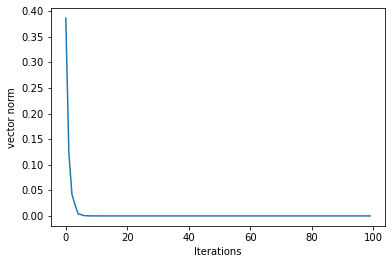

In [41]:
def DiagDom(A):
    diag_coeff = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=1) - diag_coeff
    if np.all(diag_coeff > row_sum):
        print("Matrix is Diagonally Dominant\n")
    else:
        print("NOT Diagonally Dominant\n")
    return


n = 100
A = generate_Diag_Dominant_matrix()
b = np.round(np.random.uniform(1, 5, 4), 0)  # B can be randomly initialised
DiagDom(A)
iteration_list = gauss_seidal(A, b, n)
# print(iteration_list)

plt.plot(iteration_list)
plt.xlabel("Iterations")
plt.ylabel("vector norm")
plt.show()


#### Question - 1 (v)

[[-7 -3 -2 -1]
 [ 1 -7  2 -3]
 [-1  0  9 -3]
 [-4  1  0  9]]
Matrix is Diagonally Dominant

System of equations:

[-7*x1 + -3*x2 + -2*x3 + -1*x4] = [  1]
[1*x1 + -7*x2 + 2*x3 + -3*x4] = [  3]
[-1*x1 + 0*x2 + 9*x3 + -3*x4] = [  4]
[-4*x1 + 1*x2 + 0*x3 + 9*x4] = [  3]

Iterations:

Iteration 0: [0. 0. 0. 0.]
1 Norm 0.0
Inf Norm:  0.0
Frobenius Norm 0.0
**************************************************
Iteration 1: [-0.14285714 -0.42857143  0.44444444  0.33333333]
1 Norm 1.349206349206349
Inf Norm:  0.4444444444444444
Frobenius Norm 0.716047210707299
**************************************************
Iteration 2: [-0.13378685 -0.46485261  0.53968254  0.31746032]
1 Norm 1.4557823129251701
Inf Norm:  0.5396825396825398
Frobenius Norm 0.7912175202887938
**************************************************
Iteration 3: [-0.14318108 -0.42954325  0.53539934  0.3255228 ]
1 Norm 1.4336464744628008
Inf Norm:  0.5353993449231544
Frobenius Norm 0.773062594672649
**************************************

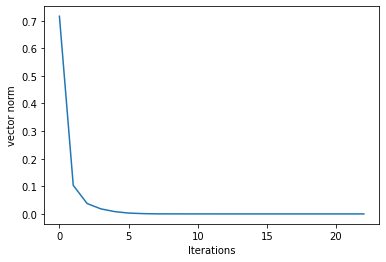

In [42]:
def DiagDom(A):
    diag_coeff = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=1) - diag_coeff
    if np.all(diag_coeff > row_sum):
        print("Matrix is Diagonally Dominant\n")
    else:
        print("NOT Diagonally Dominant\n")
    return


n = 100
A = generate_Diag_Dominant_matrix()
b = np.round(np.random.uniform(1, 5, 4), 0)  # B can be randomly initialised
DiagDom(A)
iteration_list = gauss_jacobi(A, b, n)
# print(iteration_list)

plt.plot(iteration_list)
plt.xlabel("Iterations")
plt.ylabel("vector norm")
plt.show()